## Ejecutar codigo para IBGM

In [1]:
import pandas as pd
import numpy as np

In [2]:
datos = pd.read_csv('datos_ibgmUsados.csv')

In [3]:
datos["Code"]=pd.Categorical(datos["OmiqFilter"]).codes

In [4]:
datos.columns, datos.shape

(Index(['BUV395-A___CD45RA', 'BUV737-A___CD56', 'BUV805-A___CD8',
        'BV421-A___CCR7', 'Super Bright 436-A___CD123', 'eFluor 450-A___CD11c',
        'BV510-A___CD3', 'Pacific Orange-A___CD20', 'BV570-A___IgM',
        'BV650-A___CD28', 'BV785-A___CD103', 'FITC-A___IgA',
        'PerCP-eFluor 710-A___TCRgd', 'cFluor YG584-A___CD4',
        'PE-Cy7-A___CXCR3', 'APC-Fire 810-A___CD38', 'PE-Fire 810-A___HLA-DR',
        'BV605-A___IgG', 'APC-R700-A___CD127', 'APC-H7-A___CD27',
        'PE-Alexa Fluor 610-A___CD24', 'PE-Alexa Fluor 700-A___CD25',
        'BB515-A___CD141', 'BV480-A___IgD', 'BV750-A___CXCR5',
        'PE-Cy5-A___CD95(Fas)', 'PerCP-Cy5.5-A___CD2',
        'Alexa Fluor 647-A___CD1c', 'Spark Blue 550-A___CD14',
        'BUV661-A___VISTA', 'Spark NIR 685-A___CD19', 'BUV496-A___CD16',
        'BUV563-A___CCR5', 'BUV615-A___NKG2d', 'BV711-A___CCR6', 'PE-A___NKG2c',
        'PE-Dazzle594-A___NKp30', 'APC-A___NKG2a', 'One', 'OmiqFilter', 'Code'],
       dtype='object'),
 (15629

Carga de librerias para hold-out (train_test_split) y la clase som (normalize)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

In [6]:
epocas=10
x = np.array(datos.iloc[:,:39])
y = np.array(datos.iloc[:, 40])

Se divide en train-test con split=1/3

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42, shuffle=True, stratify=y)

In [8]:
%run "clase_SOM_neurona.ipynb"

## Creación y entrenamiento del mapa

In [9]:
mapa = som(filas=10, columnas=10, dim=39, init_alfa=0.05, init_radious=5)

In [10]:
mapa.fit(X_train, epocas)   

[4:38:48<00:00] 1047149/1047149 | Epoch:0   R:5     : 100%|███████████ 62.60it/s
[3:28:57<00:00] 1047149/1047149 | Epoch:1   R:4     : 100%|███████████ 83.52it/s
[2:14:51<00:00] 1047149/1047149 | Epoch:2   R:3     : 100%|██████████ 129.42it/s
[1:20:56<00:00] 1047149/1047149 | Epoch:3   R:2     : 100%|██████████ 215.63it/s
[34:33<00:00] 1047149/1047149 | Epoch:4   R:1     : 100%|████████████ 504.95it/s
[10:26<00:00] 1047149/1047149 | Epoch:5   R:0     : 100%|███████████ 1671.87it/s
[09:59<00:00] 1047149/1047149 | Epoch:6   R:0     : 100%|███████████ 1747.47it/s
[10:10<00:00] 1047149/1047149 | Epoch:7   R:0     : 100%|███████████ 1716.56it/s
[10:52<00:00] 1047149/1047149 | Epoch:8   R:0     : 100%|███████████ 1605.48it/s
[10:21<00:00] 1047149/1047149 | Epoch:9   R:0     : 100%|███████████ 1685.56it/s


In [11]:
mapa.neuron_labeling(nclus=60)

### Evaluamos con el conjunto train

In [28]:
y_train_pred=mapa.label_predict(X_train)

100%|███████████████████████████████| 1047149/1047149 [03:34<00:00, 4880.76it/s]


In [29]:
np.unique(y_train_pred)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59])

In [30]:
np.unique(y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50],
      dtype=int8)

In [31]:
n_cells=len(np.unique(y_train))

In [32]:
n_clusters=len(np.unique(y_train_pred))

In [33]:
n_cells, n_clusters

(51, 60)

In [34]:
F_mat = np.zeros((n_cells, n_clusters))
pr_mat = np.zeros((n_cells, n_clusters))
re_mat = np.zeros((n_cells, n_clusters))

In [35]:
for i in tqdm(range(n_cells)):
    for j in range(n_clusters):
        tp=((y_train == np.unique(y_train)[i]) * (y_train_pred==np.unique(y_train_pred)[j])).sum()
        fp=((y_train != np.unique(y_train)[i]) * (y_train_pred==np.unique(y_train_pred)[j])).sum()
        fn=((y_train == np.unique(y_train)[i]) * (y_train_pred!=np.unique(y_train_pred)[j])).sum()
        if tp==0:
            pr_mat[i,j]=0
            re_mat[i,j]=0
            F_mat[i,j]=0
        else:
            pr_mat[i,j]=tp/(tp+fp)
            re_mat[i,j]=tp/(tp+fn)
            F_mat[i,j]=(2*pr_mat[i,j]*re_mat[i,j])/(pr_mat[i,j]+re_mat[i,j])

100%|███████████████████████████████████████████| 51/51 [05:25<00:00,  6.39s/it]


In [36]:
pr=0
re=0
F_score=0
for i in tqdm(range(n_cells)):
    j_max = np.argmax(F_mat[i,:])
    pr+=((y_train == np.unique(y_train)[i]).sum()*pr_mat[i,j_max])
    re+=((y_train == np.unique(y_train)[i]).sum()*re_mat[i,j_max])
    F_score+=((y_train == np.unique(y_train)[i]).sum()*F_mat[i,j_max])
pr=pr/len(y_train)
re=re/len(y_train)
F_score=F_score/len(y_train)
pr, re, F_score

100%|███████████████████████████████████████████| 51/51 [00:04<00:00, 11.24it/s]


(np.float64(0.3907711016905728),
 np.float64(0.2706911814842014),
 np.float64(0.29693195719103116))

### Ahora evaluamos con el conjunto test

In [21]:
y_test_pred=mapa.label_predict(X_test)

100%|█████████████████████████████████| 515761/515761 [01:42<00:00, 5021.20it/s]


In [22]:
np.unique(y_test)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50],
      dtype=int8)

In [23]:
np.unique(y_test_pred)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59])

In [24]:
n_cells=len(np.unique(y_test))
n_clusters=len(np.unique(y_test_pred))
n_cells, n_clusters

(51, 60)

In [25]:
F_mat = np.zeros((n_cells, n_clusters))
pr_mat = np.zeros((n_cells, n_clusters))
re_mat = np.zeros((n_cells, n_clusters))

In [26]:
for i in tqdm(range(n_cells)):
    for j in range(n_clusters):
        tp=((y_test == np.unique(y_test)[i]) * (y_test_pred==np.unique(y_test_pred)[j])).sum()
        fp=((y_test != np.unique(y_test)[i]) * (y_test_pred==np.unique(y_test_pred)[j])).sum()
        fn=((y_test == np.unique(y_test)[i]) * (y_test_pred!=np.unique(y_test_pred)[j])).sum()
        if tp==0:
            pr_mat[i,j]=0
            re_mat[i,j]=0
            F_mat[i,j]=0
        else:
            pr_mat[i,j]=tp/(tp+fp)
            re_mat[i,j]=tp/(tp+fn)
            F_mat[i,j]=(2*pr_mat[i,j]*re_mat[i,j])/(pr_mat[i,j]+re_mat[i,j])

100%|███████████████████████████████████████████| 51/51 [02:36<00:00,  3.07s/it]


In [27]:
pr=0
re=0
F_score=0
for i in tqdm(range(n_cells)):
    j_max = np.argmax(F_mat[i,:])
    pr+=((y_test == np.unique(y_test)[i]).sum()*pr_mat[i,j_max])
    re+=((y_test == np.unique(y_test)[i]).sum()*re_mat[i,j_max])
    F_score+=((y_test == np.unique(y_test)[i]).sum()*F_mat[i,j_max])
pr=pr/len(y_test)
re=re/len(y_train)
F_score=F_score/len(y_test)
pr, re, F_score

100%|███████████████████████████████████████████| 51/51 [00:02<00:00, 22.58it/s]


(np.float64(0.3911224856414318),
 np.float64(0.1334327779523258),
 np.float64(0.2974112473023869))

In [48]:
f_clases=[]
nombre_clases=pd.Categorical.from_codes(np.unique(y_test), np.unique(datos["OmiqFilter"]))
for i in tqdm(range(n_cells)):
    j_max = np.argmax(F_mat[i,:])
    f_clases.append(F_mat[i,j_max])

100%|███████████████████████████████████████| 51/51 [00:00<00:00, 189804.35it/s]


## F-scores por población sobre el conjunto de validación

In [74]:
df_plot=pd.DataFrame({"Clases": nombre_clases, "F-score": f_clases, "Abundancia": datos["Code"].value_counts().sort_index()})
df_sorted=df_plot.sort_values(by="Abundancia",ascending=False)


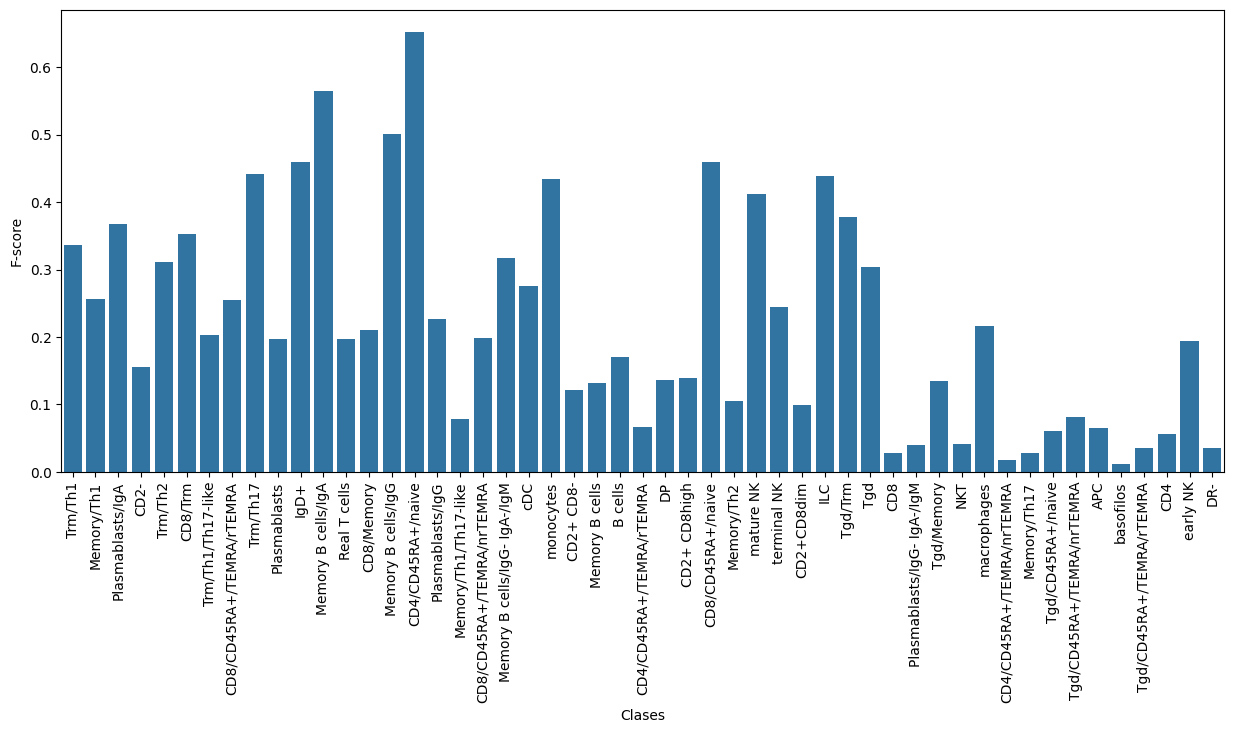

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
sns.barplot(data=df_sorted, x="Clases", y="F-score", order=df_plot.sort_values(by="Abundancia",ascending=False)["Clases"])
plt.xticks(rotation=90)
plt.savefig("histograma_fscores_ordenados_abundancia.png", dpi=300, bbox_inches="tight")

## Distribución clases

In [83]:
clases, counts= np.unique(datos["OmiqFilter"], return_counts=True)
df_abundancia=pd.DataFrame({"Clase": clases, "Porcentaje": counts*100/sum(counts)})

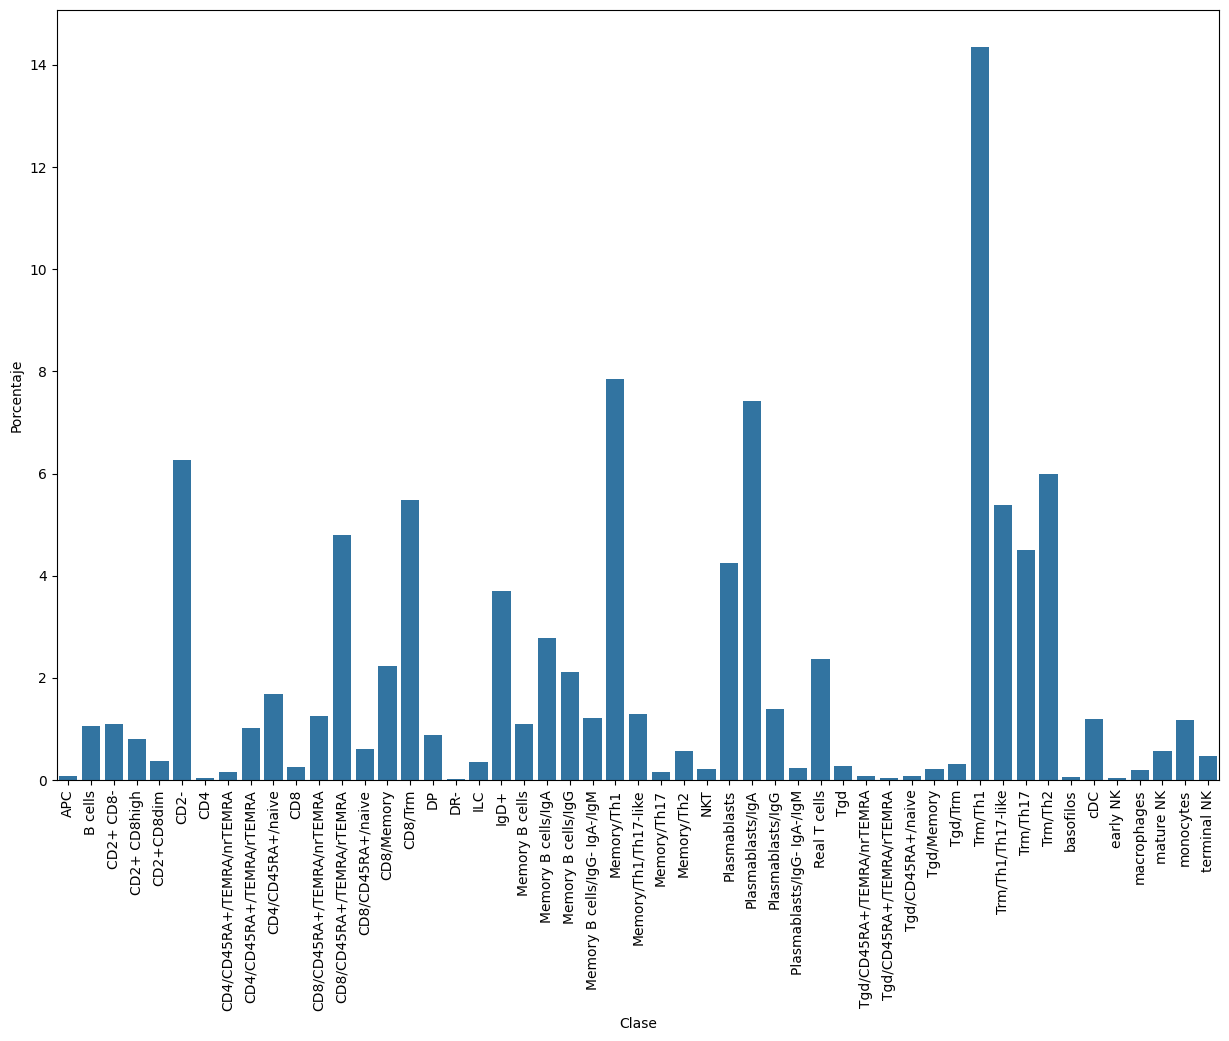

In [84]:
plt.figure(figsize=(15,10))
sns.barplot(data=df_abundancia, x="Clase", y="Porcentaje")
plt.xticks(rotation=90)
plt.savefig("histograma_porcentaje_todas_clases.png", dpi=300, bbox_inches="tight")